<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 3
## Síntesis de filtros de maxima planicidad
### Jorge Andres Niño


A partir de la plantilla presentada a continuación, deseamos sintetizar un filtro pasabajos que cumpla con los parametros establecidos de la misma. Para ello, procederemos a deducir la expresión del mismo a partir de la función de maxima planicidad, obteniendo la respuesta en frecuencia, y luego sintetizamos el circuito pasivo a partir de los parámetros fundamentales, $\omega _0$ y $Q$.

![*Figura 1*](Plantilla_ts3.png)

## Síntesis de la función transferencia y circuito normalizado.

Se presenta la síntesis de la función transferencia a partir de la función de maxima planicidad. Al llegar al polinomio final de orden 3, se encuentran las raices mediante un programa para hallar raices de polinomio, y luego se sintetiza el mismo sistema usando la normalización mediante la frecuencia de Butterworth ($ \omega_B$)

In [1]:
from IPython.display import IFrame, display
IFrame("./TS3_res.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [2]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt


# las librerías que usarremos las cargamos solo una vez.

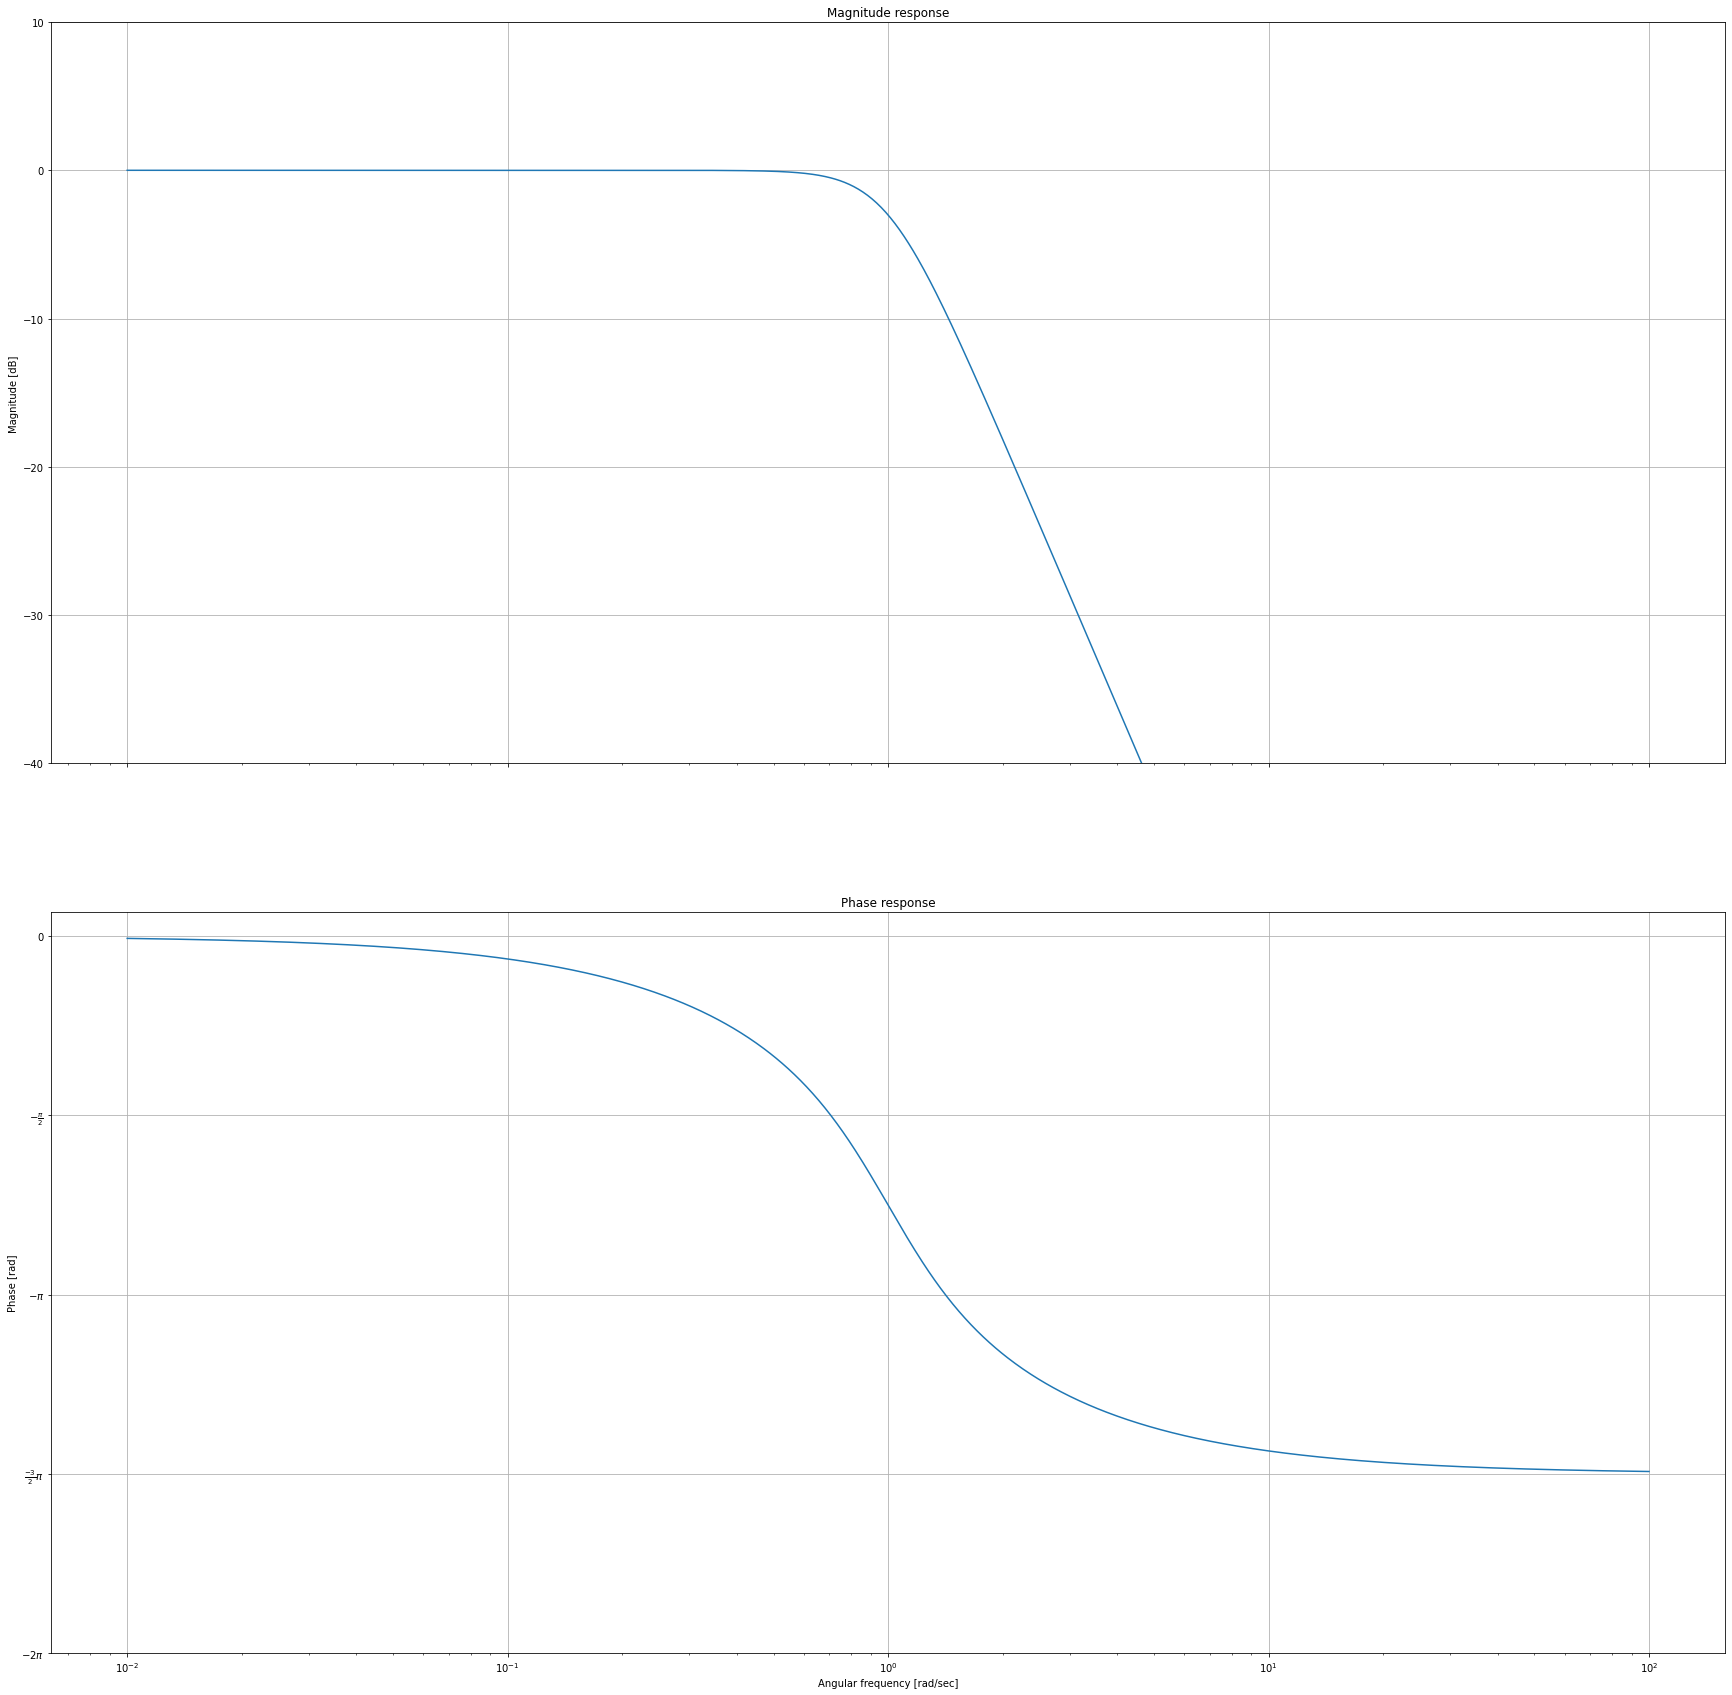

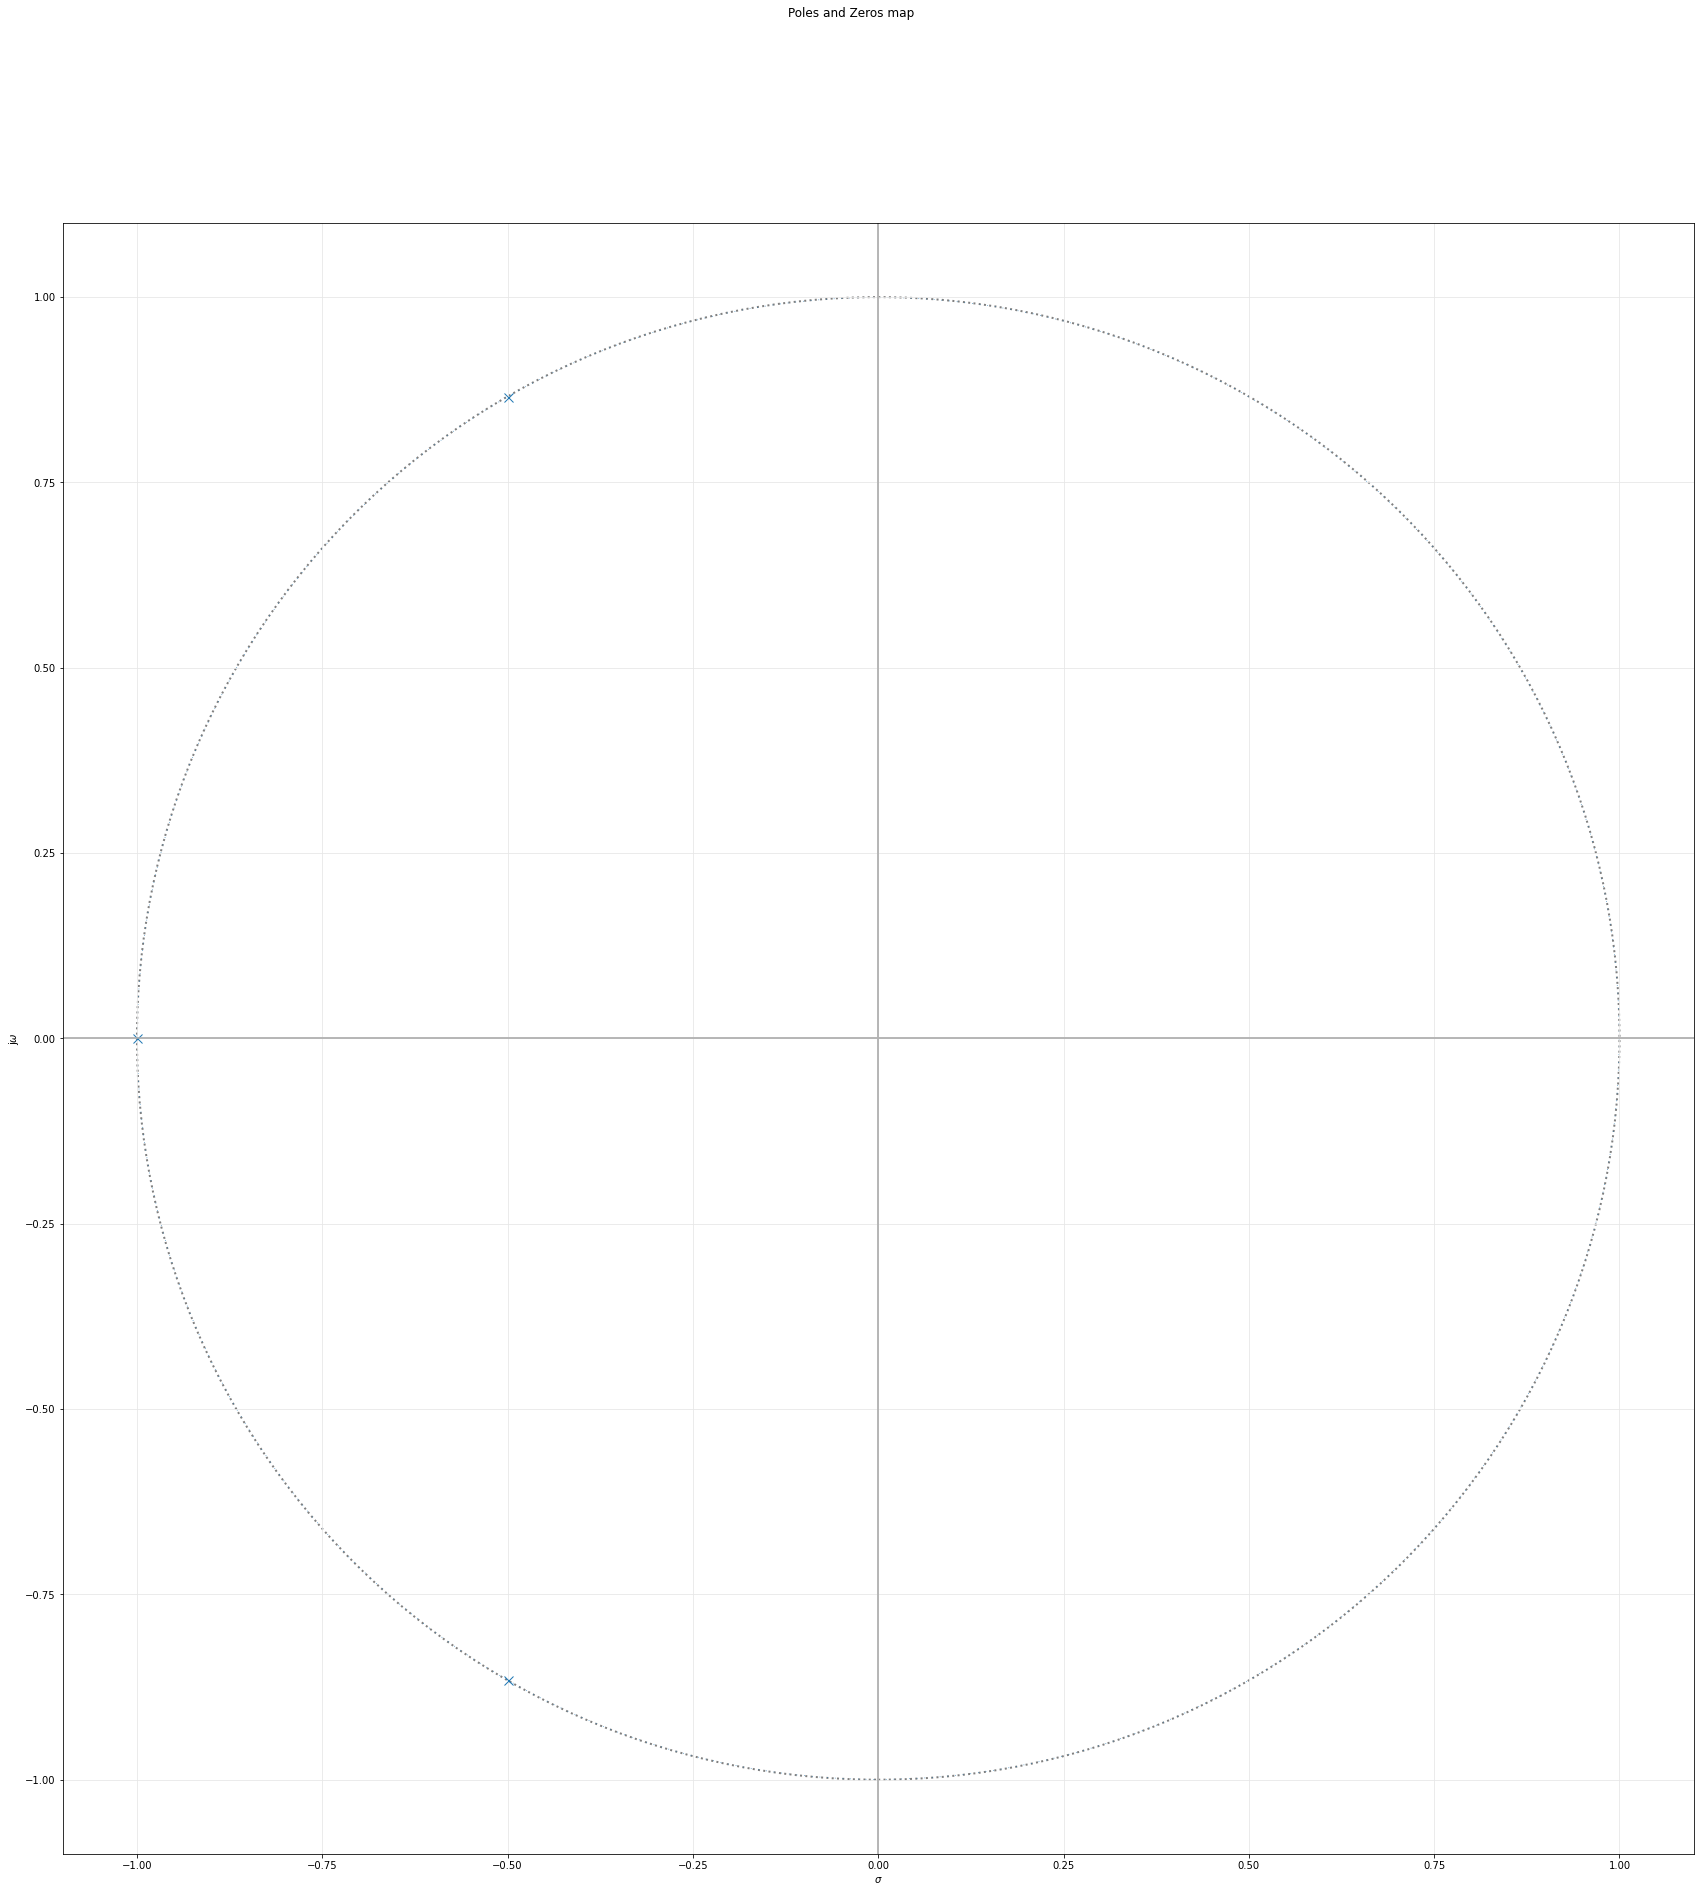

In [4]:
#%% Funcion trasnferencia:
ep= np.sqrt(0.259)
w0 = 1.252
b = 2*np.power(ep,-1/3)
c = 2*np.power(ep,-2/3)
num1= np.array([1/ep])
den1 = np.array([1/ep, c*w0, b*w0**2, w0**3 ])
H1 = Funcion.TransferFunction( num1, den1 )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
_, axes_hdl = bodePlot(H1)
# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-40,10])
plt.gca
pzmap(H1)
plt.rcParams['figure.figsize'] = (30,30)
plt.show()


Simulamos el sistema con valores normalizados en LTSPICE. Recordemos que entonces vamos a graficar en función de la frecuencia y no de la pulsación angular, con lo cual debemos determinar cual sera la frecuencia central que nos dara la simulación. Para ello obtenemos $f_0 = \frac {\omega _0}{2*\pi}$ con lo cual $f_0 = 159,23 Hz$. Se coloco la primer etapa correspondiente al polinomio de segundo orden y la segunda etapa correspondiente al polinomio de primer orden obtenido mas arriba en la síntesis:

![*Figura 6*](LTCIRC.png)

![*Figura 7*](LTSIM.png)

En la figura de la respuesta en frecuencia podemos observar que el primer cursor nos señala $-0.999 db$ a $1.001 Hz$ con lo cual podemos decir que cumplimos con esa parte de la plantilla. Luego en $f= 2*f_0$, con el segundo cursor obtenemos una atenuaicion de $12.42 db$, que es casi exacto el valor obtenido en la síntesis empleando las formulas de maxima planicidad para un filtro de orden 3. Solo nos queda desnormalizar a $f_0 = 1.5 KHz$ y a una impedancia razonable y deberiamos obtener la respuesta requerida.

# Conclusiones:
 